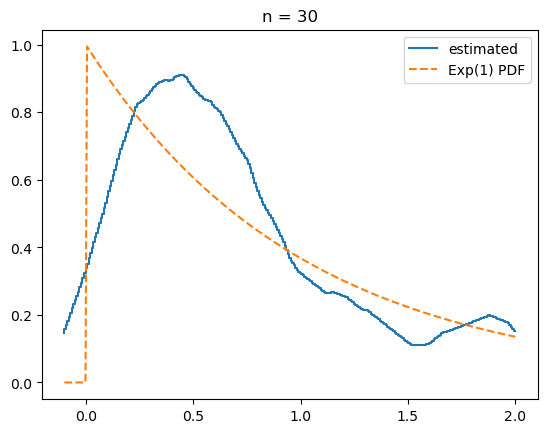

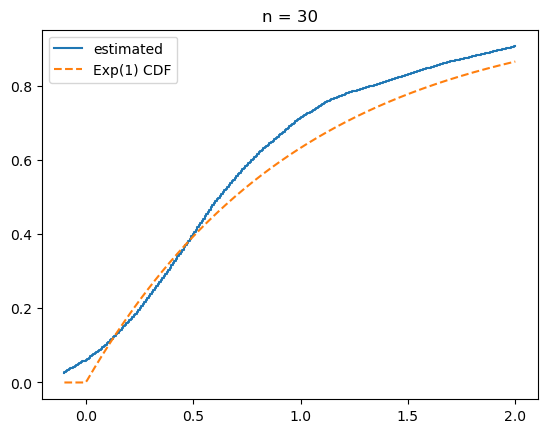

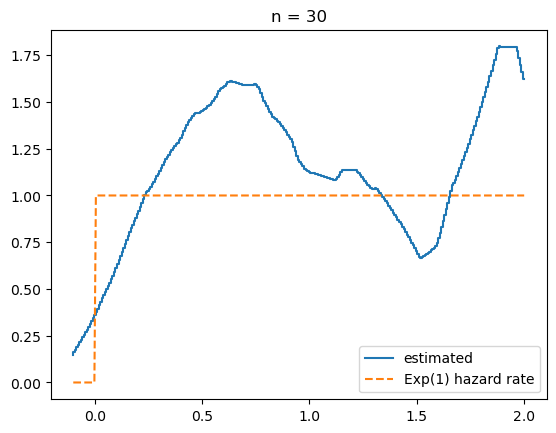

In [38]:
import numpy as np
import matplotlib.pyplot as plt

n = 30 # sample size

try:
    assert(x.shape[0] == n)  
except:
    rng = np.random.default_rng(10)
    x = rng.exponential(size = n)

def tent_func(z, d = None):
    if d is None:
        d = np.sqrt(n)/2
    return d*np.maximum(1-d*np.abs(z), 0)

def tent_func_int(z, d = None):
    if d is None:
        d = np.sqrt(n)/2

    return np.clip((1+d*z)/2, a_min = 0, a_max=1)
    

def hazard_est(t, smooth_f, smooth_f_int):
    
    t_minus_x = np.subtract.outer(t, x)  
    # the (i, j) element = t_i - x_j
    f = np.mean(smooth_f(t_minus_x), axis = 1)
    F = np.mean(smooth_f_int(t_minus_x), axis = 1)
    h = f / (1-F)
    return f, F, h


t = np.linspace(-.1, 2, num = 300)
f, F, h = hazard_est(t, smooth_f = tent_func, smooth_f_int = tent_func_int)


plt.plot(t, f, drawstyle = "steps", label = "estimated")
plt.plot(t, np.exp(-t)*(t>0), linestyle = "dashed", label = "Exp(1) PDF")
plt.title(f"n = {x.shape[0]}")
plt.legend()
plt.show()


plt.plot(t, F, drawstyle = "steps", label = "estimated")
plt.plot(t, (1-np.exp(-t))*(t>0), linestyle = "dashed", label = "Exp(1) CDF")
plt.title(f"n = {x.shape[0]}")
plt.legend()
plt.show()


plt.plot(t, h, drawstyle = "steps", label = "estimated")
plt.plot(t, 1*(t>0), linestyle = "dashed", label = "Exp(1) hazard rate")
plt.title(f"n = {x.shape[0]}")
plt.legend()
plt.show()